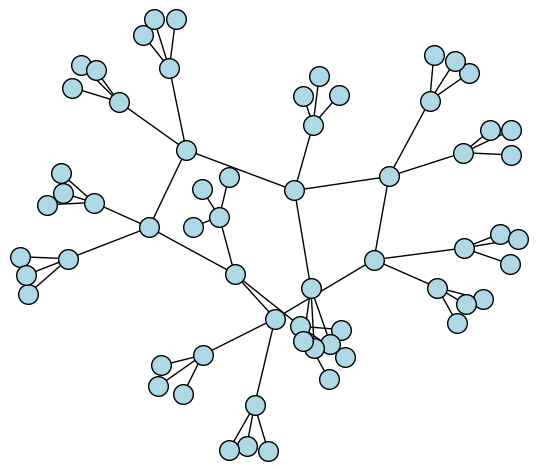

In [861]:
# Draw volcano structure
transparent_background = True
cycle_length = 7
ell = 3
depth = 3

vertex_set_levelled = []
edge_set = []

for d in range(0, depth):
    new_level = []
    if d == 0:
        for r in range(0, cycle_length):
            new_level.append([r])
            edge_set.append(([r], [ZZ(mod(r + 1, cycle_length))]))
    if d == 1:
        for v in vertex_set_levelled[-1]:
            for r in range(0, ell - 1):
                new_level.append(v + [r])
                edge_set.append((v, v + [r]))
    if d > 1:
        for v in vertex_set_levelled[-1]:
            for r in range(0, ell):
                new_level.append(v + [r])
                edge_set.append((v, v + [r]))
    vertex_set_levelled.append(new_level)

vertex_set = [str(r) for v in vertex_set_levelled for r in v]
edge_set = [(str(v1), str(v2)) for (v1, v2) in edge_set]

G = Graph([vertex_set, edge_set])

G.plot(transparent=transparent_background, vertex_labels=False, vertex_color="lightblue")

Draw each layer in a circle

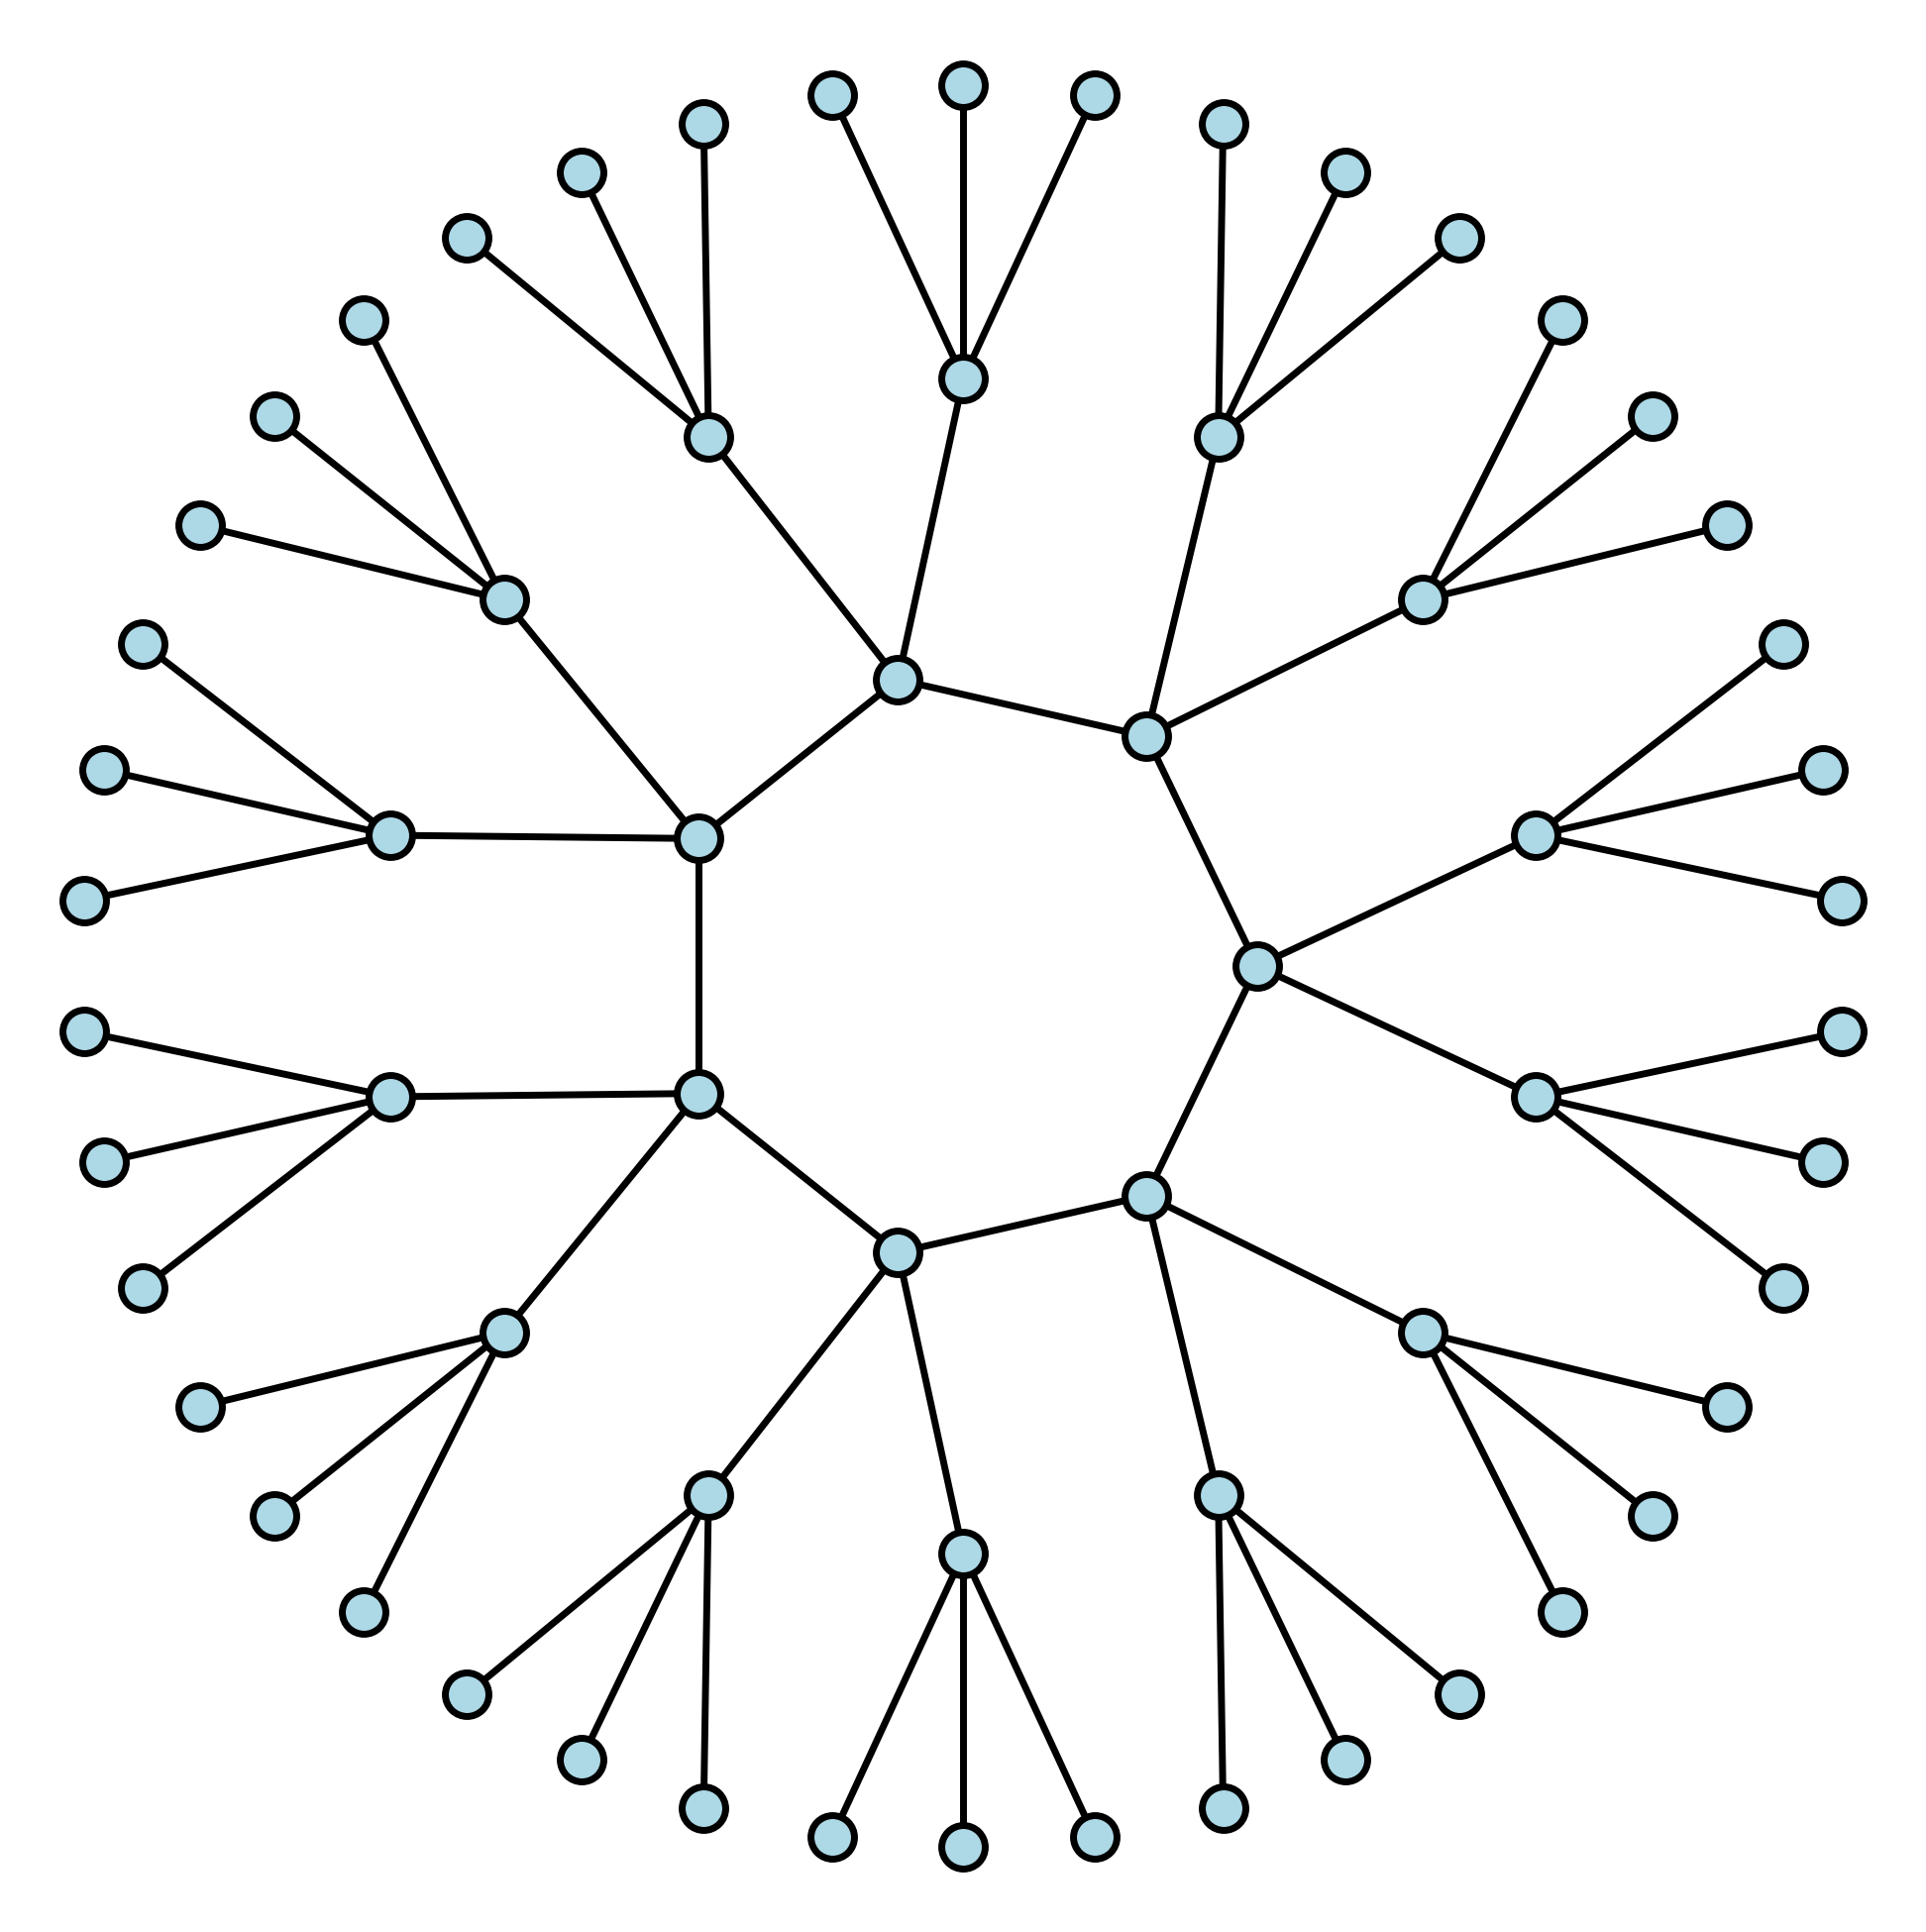

In [862]:
inner_radius = 3
radius_per_level = 3

def circle_points(radius, number_points, number_per_section=0, prev_offset=0):
    angle_per_vertex = (2*pi) / number_points
    offset_angle = 0
    if number_per_section > 0:
        offset_angle = prev_offset + (angle_per_vertex * (number_per_section-1)) / 2 # This needs to be summed up over each layer
    return offset_angle, [[float(radius * cos(r*angle_per_vertex - offset_angle)), float(radius * sin(r*angle_per_vertex - offset_angle))] for r in range(0, number_points)]

points = []
cur_rad = inner_radius
offset_angle = 0
for d in range(0, len(vertex_set_levelled)):
    vset = vertex_set_levelled[d]
    num_points = len(vset)
    num_points_per_section = ell
    if d == 0: num_points_per_section = 0
    if d == 1: num_points_per_section = ell - 1
    offset_angle, new_points = circle_points(cur_rad, num_points, num_points_per_section, offset_angle)
    points += new_points
    cur_rad += radius_per_level

pos_dict = {G.vertices()[k]: points[k] for k in range(0, len(G.vertices()))}
plot = G.graphplot(transparent=transparent_background, vertex_labels=False, vertex_color="lightblue", pos=pos_dict, vertex_size=40, dpi=500)
plot.show()